# Cube conversion

This notebooks creates an optimized version of each `SEG-Y` cube.
The exact format (`HDF5`, `QHDF5`, `QSGY`) depends on `FORMAT` and `QUANTIZE` parameters.

Pseudocode of this notebook looks like:

```python
for each cube:
    mkdir
    infer geometry
    if SHOW, log to std.out
    
    convert segy to a desired FORMAT
```

* `paths` controls which cubes are converted
* `RECREATE` determines whether already converted volumes should be re-converted
* `FORMAT` and `QUANTIZE` determine the exact format to convert to
* `SHOW` allows to control whether results are shown in the notebook itself
* `DRY` can be used to check which operations will happen, without actually executing them

In [1]:
import os
import sys
import warnings
warnings.filterwarnings("ignore")

from glob import glob
import matplotlib.pyplot as plt

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
from seismiqb import Geometry
from batchflow import Notifier

In [2]:
# Global parameters
SEPARATOR = '▆'*60

RECREATE = True
SHOW = True
DRY_RUN = False

# Conversion options. Format should be one of {'qsgy', 'hdf5', 'qhdf5'}
CONVERT = True
FORMAT = 'qsgy'
QUANTIZE = True
CONVERSION_KWARGS = {
    # 'chunk_size_divisor' : 3,     # keep smaller chunks in `hdf5`
}

In [8]:
# paths = sorted(glob('/data/seismic_data/seismic_interpretation/*_*/*.s*y'))
paths = [f"/cubes/{p}/{p}.sgy" for p in ['090_I']]
[print(path) for path in paths[:]];

/cubes/090_I/090_I.sgy


0it [00:00, ?it/s]

  0%|                                                                                                         …

▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆
▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆
Working with /cubes/090_I/090_I.sgy


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


Processed geometry for cube        /cubes/090_I/090_I.sgy
Index headers:                     ['INLINE_3D', 'CROSSLINE_3D']
Traces:                            11,829,042
Shape:                             (1479, 7998, 1500)
Time delay:                        0 ms
Sample rate:                       4.0 ms
Area:                              89.8 km²

File size:                         68.744 GB
Instance (in-memory) size:         0.463 GB

Number of dead  traces:            5,436,536
Number of alive traces:            6,392,506
Fullness:                          0.54

Value statistics:
mean | std:                              0.00 | 0.09      
min | max:                              -3.68 | 4.17      
q01 | q99:                              -0.29 | 0.29      
Number of unique values:             55689475

C 1 SEGY OUTPUT FROM Petrel 2020.4 Wednesday, June 01 2022 00:19:08             
C 2 Name: East_Odoptu3D_PostStack_cube Type: 3D seismic                         
C 3                      

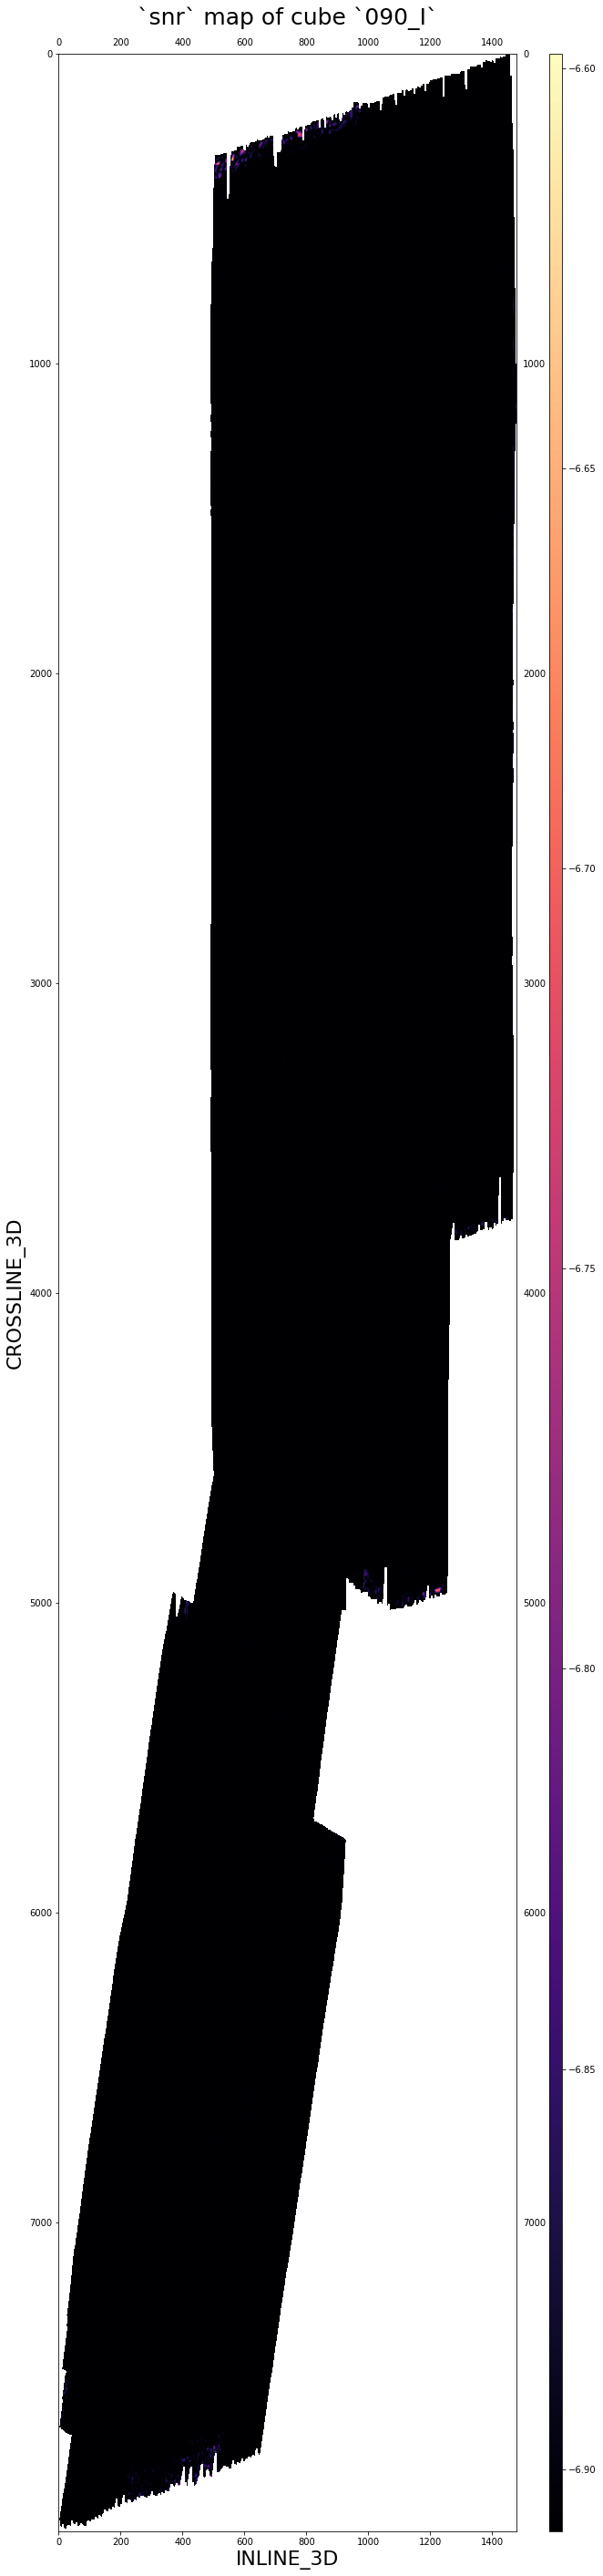

Convert to `090_I.qsgy`:   0%|                                                   | 0/11829042 [00:00<?, ?it/s]

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


Convert to `090_I.qsgy`: 100%|█████████████████████████████████| 11829042/11829042 [02:06<00:00, 93559.97it/s]


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


Processed geometry for cube        /cubes/090_I/090_I.qsgy
Index headers:                     ['INLINE_3D', 'CROSSLINE_3D']
Traces:                            11,829,042
Shape:                             (1479, 7998, 1500)
Time delay:                        0 ms
Sample rate:                       4.0 ms
Area:                              89.8 km²

File size:                         19.169 GB
Instance (in-memory) size:         0.463 GB

Number of dead  traces:            5,436,536
Number of alive traces:            6,392,506
Fullness:                          0.54

Value statistics:
mean | std:                             -0.57 | 31.42     
min | max:                            -127.00 | 127.00    
q01 | q99:                            -127.00 | 127.00    
Number of unique values:                  255

Quantization ranges:                    -0.29 | 0.29      
Quantization error:                     0.048




CPU times: user 9min 53s, sys: 1min 50s, total: 11min 44s
Wall time: 3min 49s

In [9]:
%%time
for path_cube in Notifier('n')(paths):
    if not os.path.exists(path_cube):
        continue
    
    # Make an instance with no actual init
    geometry = Geometry.new(path=path_cube, init=False)
    path_converted = geometry.make_output_path(format=FORMAT, quantize=QUANTIZE)

    if os.path.exists(path_converted) and not RECREATE:
        print(f'{path_converted} already exists, skipping')
        continue
    if DRY_RUN:
        print(f'Will convert ::: {path_cube}\nto           ::: {path_converted}\n')
        continue

    if SHOW:
        print(SEPARATOR); print(SEPARATOR);
        print('Working with', path_cube)

        
    # Re-open geometry, collect stats
    geometry = Geometry.new(path=path_cube,
                            index_headers=Geometry.INDEX_HEADERS_POSTSTACK,
                            additional_headers=Geometry.ADDITIONAL_HEADERS_POSTSTACK_FULL,
                            reload_headers=True,
                            collect_stats=True, recollect_stats=True)
    if SHOW:
        # Textual
        geometry.print()
        print()
        geometry.print_textual()

        # Graphs
        geometry.show('snr')
        plt.show()


    # Conversion
    if CONVERT is False:
        continue
    geometry_converted = geometry.convert(path=path_cube[:-4] + '.qsgy', format=FORMAT, quantize=QUANTIZE, **CONVERSION_KWARGS)
    if SHOW:
        geometry_converted.print()
    print('\n'*3)